In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv('used_car_price_dataset_extended.csv')
df

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes


1. Análise exploratória de dados: O aluno deverá realizar uma análise inicial dos dados do dataset
escolhido, identificando quais variáveis estão presentes, quais são numéricas/categóricas e se
existem valores faltantes ou outliers.

In [5]:
#identificando as variáveis presentes
df.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

In [6]:
#quais são numéricas/categóricas
df.dtypes

make_year               int64
mileage_kmpl          float64
engine_cc               int64
fuel_type              object
owner_count             int64
price_usd             float64
brand                  object
transmission           object
color                  object
service_history        object
accidents_reported      int64
insurance_valid        object
dtype: object

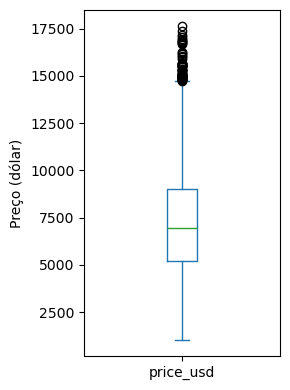

In [9]:
#se existem valores faltantes ou outliers.
#verificando se tem outliers do preço
ax=(df['price_usd']).plot.box(figsize=(3,4))
ax.set_ylabel('Preço (dólar)')
plt.tight_layout()
plt.show()


In [17]:
media_preco=df['price_usd'].mean()
media_preco=media_preco.round(2)
media_preco

7179.75

In [25]:
media_acidente=df['accidents_reported'].mean()
media_acidente=media_acidente.round(2)
media_acidente

0.49

In [29]:
qte_tipo=df.groupby('transmission')['transmission'].count()
qte_tipo
#ver quais possuem mais carros, automaticos ou manual

transmission
Automatic    4015
Manual       5985
Name: transmission, dtype: int64

In [30]:
qte_dono=df.groupby('owner_count')['owner_count'].count()
qte_dono

owner_count
1    2003
2    2002
3    1989
4    1969
5    2037
Name: owner_count, dtype: int64

2. Feature engineering: Com base na análise exploratória, o aluno deverá realizar transformações
nas variáveis do dataset, como normalização, codificação de variáveis categóricas, criação de
novas features, dentre outras técnicas.

In [38]:
def donos(owner_count):
    if owner_count <=3:
        return 'poucos donos'
    else:
        return 'muitos donos'
df['Pouco/muitos donos']=df['owner_count'].apply(donos)

In [39]:
df

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,Pouco/muitos donos
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No,muitos donos
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes,muitos donos
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes,muitos donos
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes,poucos donos
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes,poucos donos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes,poucos donos
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes,poucos donos
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes,muitos donos
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes,muitos donos


In [49]:
def mediap(price_usd):
    if price_usd > media_preco:
        return 'acima da média de preço'
    else:
        return 'abaixo da média de preço'
df['Abaixo ou acima da média']=df['price_usd'].apply(mediap)

In [50]:
df

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid,Pouco/muitos donos,Abaixo ou acima da média
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No,muitos donos,acima da média de preço
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes,muitos donos,abaixo da média de preço
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes,muitos donos,acima da média de preço
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes,poucos donos,abaixo da média de preço
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes,poucos donos,abaixo da média de preço
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes,poucos donos,abaixo da média de preço
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes,poucos donos,acima da média de preço
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes,muitos donos,abaixo da média de preço
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes,muitos donos,acima da média de preço


3. Aprendizagem supervisionada: O aluno deverá escolher um dos modelos de aprendizagem
supervisionada (Regressão Linear, Naive Bayes, Regressão Logística, KNN, Árvore de Decisão,
Random Forest ou XGBoost), realizar o treinamento do modelo com o dataset e avaliar seu
desempenho com métricas adequadas.

In [70]:
independentes=df[['mileage_kmpl', 'make_year', 'engine_cc', 'fuel_type', 'owner_count', 'brand', 'transmission']]


In [71]:
x=independentes
y=df['price_usd']
x=pd.get_dummies(x)#transforma a cada categoria que é uma sring em uma nova coluna, sendo true ou false o valor que irá retornar se faz parte ou não

In [72]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.2, random_state=42)

In [73]:
linear=LinearRegression().fit(x,y)
linear

LinearRegression()

In [79]:
y_prev=linear.predict(x_te)
y_prev

array([12062.73850378,  4686.51744995,  7090.69884326, ...,
       13291.8664232 ,  9611.20658036,  3334.38208716])

In [80]:
mse = mean_squared_error(y_te, y_prev)
r2 = r2_score(y_te, y_prev)

print(f"MSE: {mse}")
print("R²:", r2)

MSE: 975595.6063960906
R²: 0.8773687544031832


4. Aprendizagem não supervisionada: O aluno deverá escolher uma técnica de aprendizagem não
supervisionada (Clusterização, Redução de Dimensionalidade, Análise de Associação, Análise de
Outlier ou Visualização de Dados), aplicá-la ao dataset e interpretar seus resultados.

In [83]:
chaves_clusterizar = ['mileage_kmpl', 'engine_cc', 'make_year', 'price_usd']

In [84]:
x_clusterizar = df[chaves_clusterizar].copy()

In [98]:
x_clusterizar

,mileage_kmpl,engine_cc,make_year,price_usd
0,8.17,4000,2001,8587.64
1,17.59,1500,2014,5943.50
2,18.09,2500,2023,9273.58
3,11.28,800,2009,6836.24
4,12.23,1000,2005,4625.79
...,...,...,...,...
9995,15.25,1500,1996,5498.71
9996,14.45,5000,1997,9588.31
9997,19.41,1000,2002,4557.10
9998,12.95,4000,2005,7413.59


In [86]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x_clusterizar)

In [89]:
n_clusters_chosen = 3

In [91]:
kmeans = KMeans(n_clusters=n_clusters_chosen, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans

KMeans(n_clusters=3, n_init=10, random_state=42)

In [100]:
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(x_clusterizar)
x_custerizar_df = pd.DataFrame(X_scaled_array, columns=chaves_clusterizar, index=x_clusterizar.index)
x_custerizar_df

,mileage_kmpl,engine_cc,make_year,price_usd
0,-1.948317,1.326559,-0.980111,0.503692
1,-0.073778,-0.609605,0.572417,-0.442289
2,0.025720,0.164861,1.647244,0.749097
3,-1.329441,-1.151732,-0.024709,-0.122897
4,-1.140395,-0.996838,-0.502410,-0.913719
...,...,...,...,...
9995,-0.539428,-0.609605,-1.577237,-0.601419
9996,-0.698625,2.101025,-1.457812,0.861697
9997,0.288394,-0.996838,-0.860686,-0.938294
9998,-0.997118,1.326559,-0.502410,0.083658


In [104]:
df_com_cluster = df.loc[x_custerizar_df.index].copy() # Garante que df_com_cluster tem as mesmas linhas de X_scaled_df
df_com_cluster['cluster'] = kmeans.fit_predict(x_custerizar_df)

In [109]:
print(f"\n--- Clusterização com K={n_clusters_chosen} ---")
print("Distribuição de carros por Cluster:")
print(df_com_cluster['cluster'].value_counts().sort_index())

print(f"\nCaracterísticas Médias de Cada Cluster (variáveis originais):")
# Mostra as médias das features ORIGINAIS (não escalonadas) para melhor interpretação
cluster_media=df_com_cluster.groupby('cluster')[chaves_clusterizar].mean()
cluster_media


--- Clusterização com K=3 ---
Distribuição de carros por Cluster:
cluster
0    3849
1    3786
2    2365
Name: count, dtype: int64

Características Médias de Cada Cluster (variáveis originais):


,mileage_kmpl,engine_cc,make_year,price_usd
cluster,,,,
0,18.107742,1699.558327,2016.259808,7479.953479
1,17.469620,1669.070259,2001.965399,4827.697747
2,18.507759,4232.811839,2009.320930,10456.465416


In [111]:
print("\nDescrições Simplificadas dos Clusters:")
for cluster_id in sorted(cluster_media.index):
    mean_mileage = cluster_media.loc[cluster_id, 'mileage_kmpl']
    mean_engine = cluster_media.loc[cluster_id, 'engine_cc']
    mean_year = int(cluster_media.loc[cluster_id, 'make_year'])
    mean_price = cluster_media.loc[cluster_id, 'price_usd']

    description = ""
    if cluster_id == 0:
        description = f"Carros mais antigos (média ~{mean_year}), motores grandes (~{mean_engine:.0f}cc), baixa eficiência (~{mean_mileage:.1f} km/l) e preços muito baixos (~${mean_price/1000:.1f}k)."
    elif cluster_id == 1:
        description = f"Carros mais novos (média ~{mean_year}), motores pequenos (~{mean_engine:.0f}cc), excelente eficiência (~{mean_mileage:.1f} km/l) e preço médio-alto (~${mean_price/1000:.1f}k)."
    elif cluster_id == 2:
        description = f"Carros de idade intermediária (~{mean_year}), motores pequenos (~{mean_engine:.0f}cc), boa eficiência (~{mean_mileage:.1f} km/l) e preços baixos (~${mean_price/1000:.1f}k)."
    elif cluster_id == 3:
        description = f"Carros muito novos (média ~{mean_year}), motores grandes (~{mean_engine:.0f}cc), baixa eficiência (~{mean_mileage:.1f} km/l) e preços muito altos (~${mean_price/1000:.1f}k)."
    print(f"  - **Cluster {cluster_id}:** {description}")




Descrições Simplificadas dos Clusters:
  - **Cluster 0:** Carros mais antigos (média ~2016), motores grandes (~1700cc), baixa eficiência (~18.1 km/l) e preços muito baixos (~$7.5k).
  - **Cluster 1:** Carros mais novos (média ~2001), motores pequenos (~1669cc), excelente eficiência (~17.5 km/l) e preço médio-alto (~$4.8k).
  - **Cluster 2:** Carros de idade intermediária (~2009), motores pequenos (~4233cc), boa eficiência (~18.5 km/l) e preços baixos (~$10.5k).


